# Лабораторная работа: Статистика
## Нетология. Курс «Python для анализа данных»
## Группа: PYDA-8A
13.06.2020


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats

## 1. Загрузить файл auto.csv

In [4]:
df = pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных

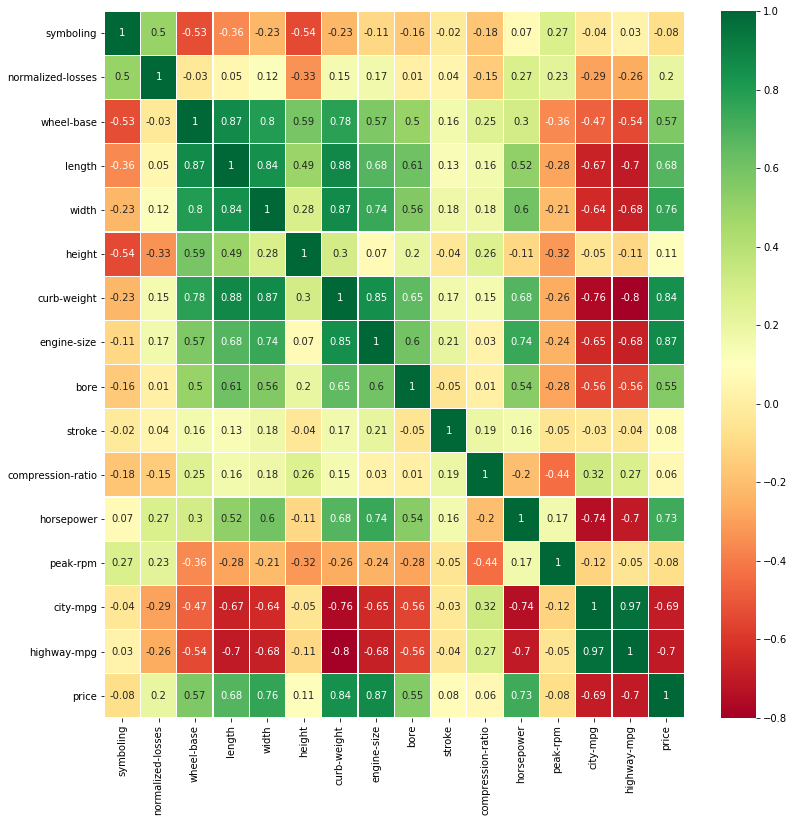

In [7]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

## 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

Text(0.5, 1.0, 'Распределение переменной Price')

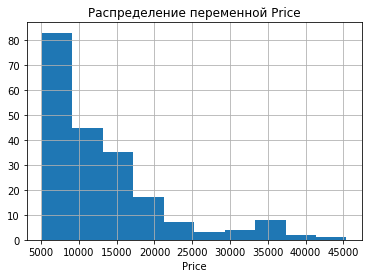

In [12]:
df.price.hist()
plt.xlabel('Price')
plt.title('Распределение переменной Price')

In [14]:
from scipy.stats import norm, kurtosis # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
kurtosis(df.price)

2.848082544390688

In [15]:
from scipy.stats import skew # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
skew(df.price) # For normally distributed data, the skewness should be about zero.

1.7534486514523662

## 5. Визуализировать несколько взаимосвязей между переменными

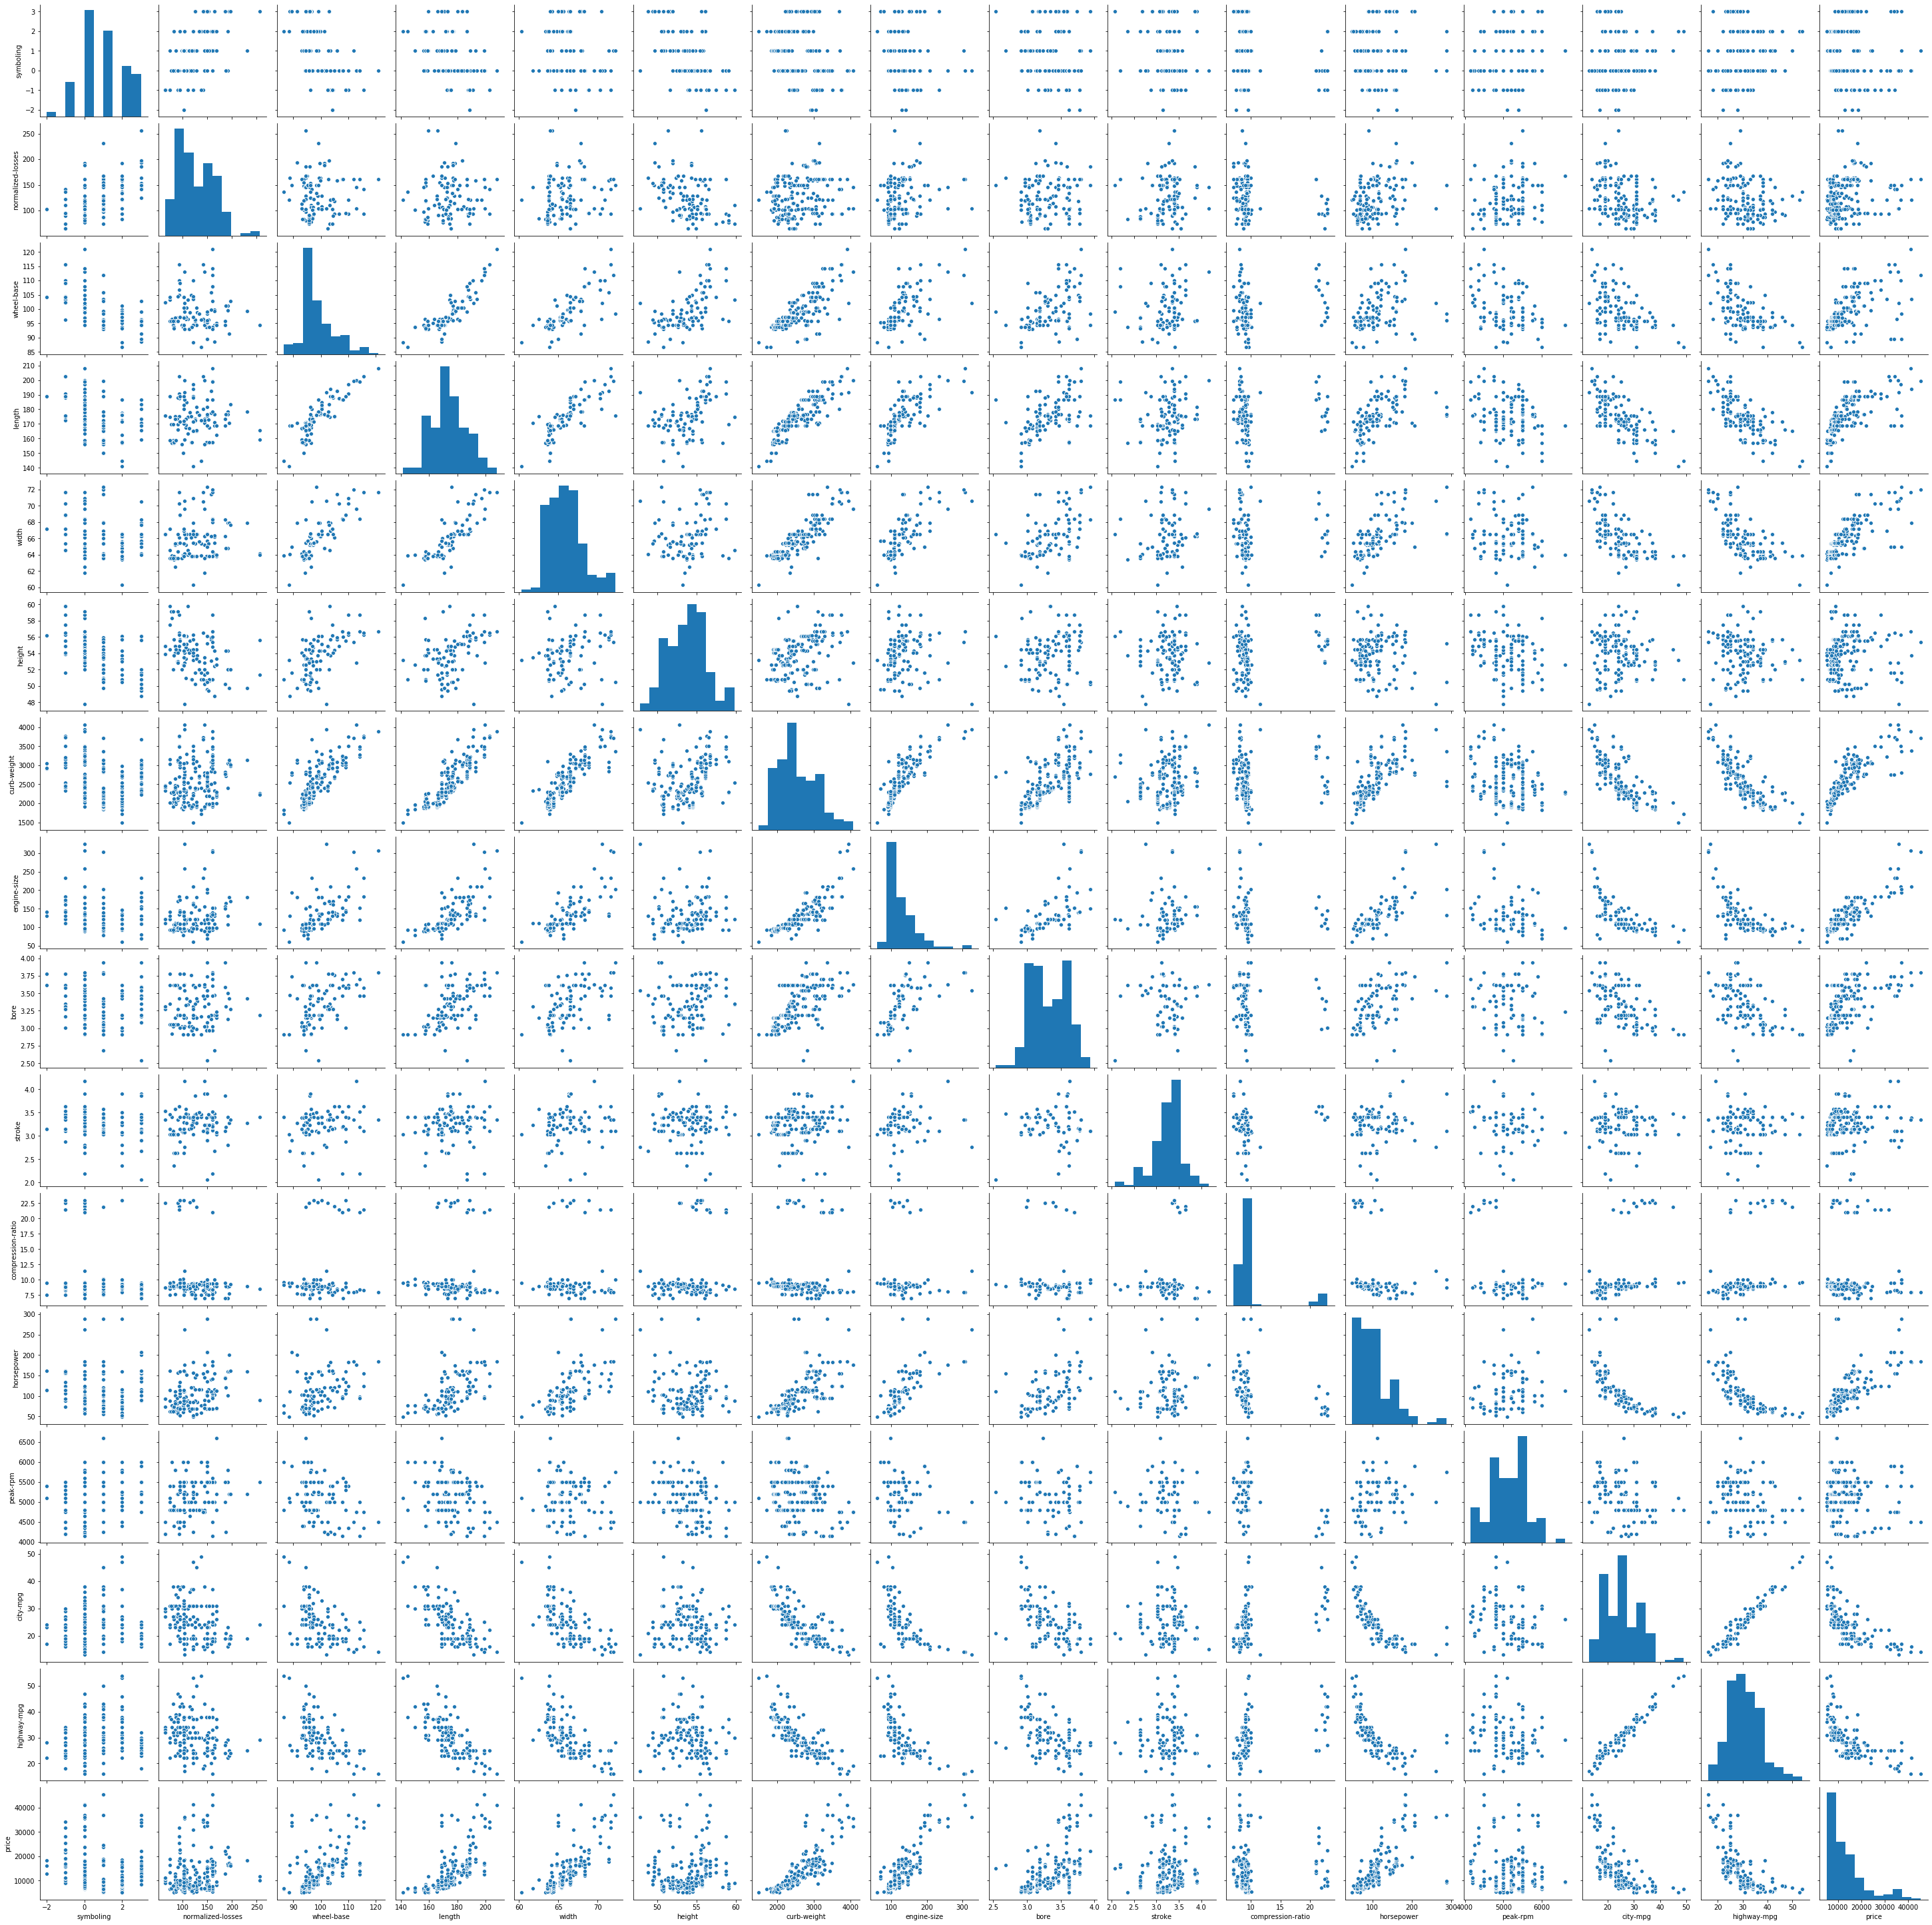

In [18]:
g = sns.pairplot(df)

Text(0, 0.5, 'engine-size')

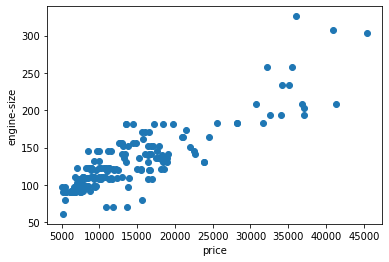

In [35]:
plt.scatter(df['price'], df['engine-size'])
plt.xlabel('price')
plt.ylabel('engine-size')

Text(0, 0.5, 'curb-weight')

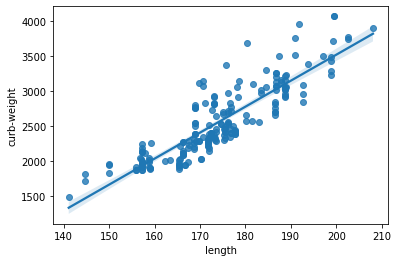

In [52]:
sns.regplot(x='length', y='curb-weight',data=df, fit_reg=True)
plt.xlabel('length')
plt.ylabel('curb-weight')
# чем длиннее автомобиль, тем больше он весит

Text(0, 0.5, 'highway-mpg')

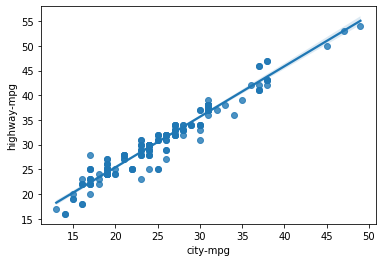

In [55]:
sns.regplot(x='city-mpg', y='highway-mpg',data=df, fit_reg=True)
plt.xlabel('city-mpg')
plt.ylabel('highway-mpg')

Text(0, 0.5, 'horsepower')

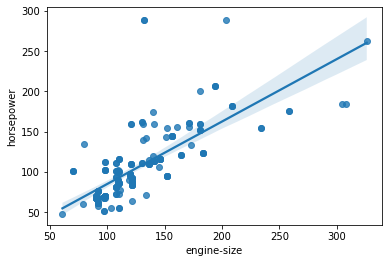

In [54]:
sns.regplot(x='engine-size', y='horsepower',data=df, fit_reg=True)
plt.xlabel('engine-size')
plt.ylabel('horsepower')

## 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

### Гипотеза H0: автомобили на газу и на дизеле проезжают одинаковое расстояние на галлон топлива

In [45]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

24.67027027027027 30.3


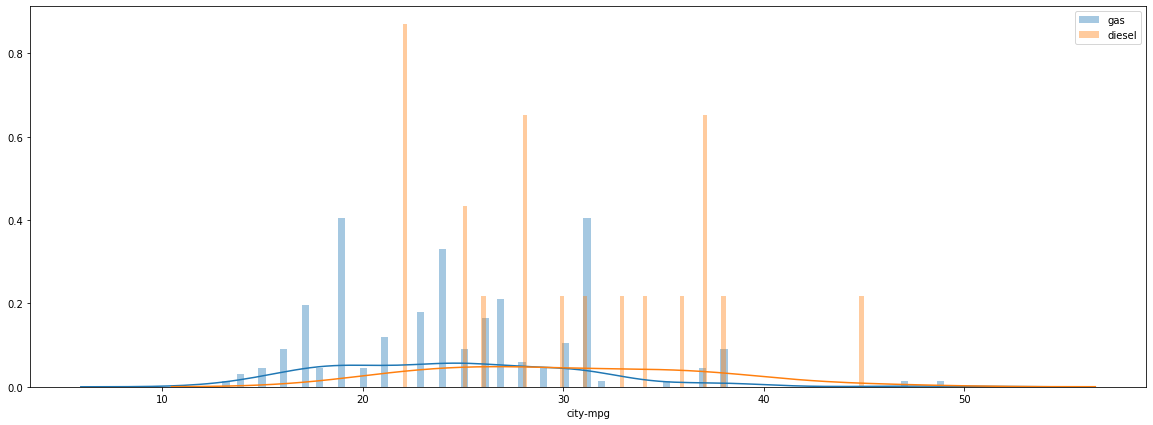

In [68]:
print(mpg_gas.mean(), mpg_diesel.mean())
plt.figure(figsize=(20,7))
sns.distplot(mpg_gas, 100)
sns.distplot(mpg_diesel, 100)
plt.legend(['gas', 'diesel'])

In [49]:
mpg_gas = df[df['fuel-type'] == 'gas']['city-mpg']
mpg_diesel = df[df['fuel-type'] == 'diesel']['city-mpg']
stats.ttest_ind(mpg_gas, mpg_diesel)

Ttest_indResult(statistic=-3.772582345058656, pvalue=0.00021196038081708785)

**Вывод:** p-value меньше 0.05 - гипотеза H0 отвергается: в среднем на галлоне дизеля можно уехать дальше

### Гипотеза H0: масса автомобиля не зависит от расположения двигателя

In [64]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

2552.371287128713 2770.6666666666665


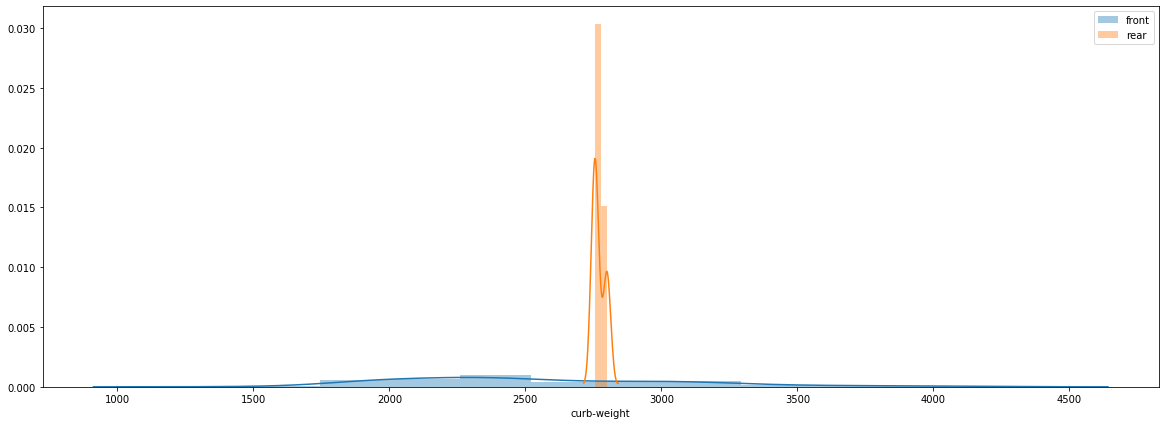

In [71]:
weight_front = df[df['engine-location'] == 'front']['curb-weight']
weight_rear = df[df['engine-location'] == 'rear']['curb-weight']
stats.ttest_ind(mpg_gas, mpg_diesel)

print(weight_front.mean(), weight_rear.mean())
plt.figure(figsize=(20,7))
sns.distplot(weight_front)
sns.distplot(weight_rear)
plt.legend(['front', 'rear'])

**Вывод:** p-value меньше 0.05 - гипотеза H0 отвергается: расположение двигателя сильно влияет на массу автомобиля

In [74]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Гипотеза H0: стоимость автомобиля не зависит от страны проихождения

In [83]:
price_ge = df[df['make'].isin(['audi', 'bmw','mercedes-benz', 'volkswagen', 'porsche'])]['price']
price_jp = df[df['make'].isin(['honda', 'mazda','mitsubishi', 'nissan', 'subaru', 'toyota'])]['price']
price_us = df[df['make'].isin(['chevrolet','dodge'])]['price']
stats.f_oneway(price_ge, price_jp, price_us)

F_onewayResult(statistic=64.17621616254188, pvalue=5.347458697281475e-21)

**Вывод:** p-value меньше 0.05 - гипотеза H0 отвергается